## 그룹화(Cluster)
- 비지도 학습 : label 이 없는 datasets

## 데이터 수집

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# iris_dataset

## 데이터분석

## 데이터 전처리

In [2]:
features = iris_dataset['data']
features[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [3]:
iris_dataset['target'], iris_dataset['feature_names']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

### 결측치 처리

### 스케일링 
- 지수화와 비슷

### 차원 축소
- 과정 : 공분산 행렬 -> 고유값(Eigenvalue), 고유벡터(Eigenvector) -> 주성분 선택 -> 데이터 변환
- 활용도 
    + 데이터 시각화
    + 잡음 제거
    + 특징 추출
    + 추천 시스템

In [11]:
from sklearn.decomposition import PCA
dim_reduce_PCA = PCA(n_components=2)    # 2차원 축소

In [12]:
features_pca = dim_reduce_PCA.fit_transform(features)

In [13]:
features.shape, features_pca.shape

((150, 4), (150, 2))

In [15]:
# 각 Vector 성분 설명력
dim_reduce_PCA.explained_variance_, dim_reduce_PCA.explained_variance_ratio_    # 92% vs 5%

(array([4.22824171, 0.24267075]), array([0.92461872, 0.05306648]))

## 데이터 분할

## 모델 학습

In [16]:
from sklearn.cluster import KMeans

### 찾은 갯수로 학습

In [17]:
# 중앙 갯수(카테고리 갯수) 지정
model_KMeans = KMeans(n_clusters=3)  # 카레고리 갯수를 임의 지정
model_KMeans.fit(X=features_pca)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## 모델 평가

In [18]:
import numpy as np
# features row별 model이 predict label 값들
# model_KMeans.labels_, 
np.unique(model_KMeans.labels_)

array([0, 1, 2], dtype=int32)

In [20]:
# 각 카테고리별 중앙 벡터 확인
model_KMeans.cluster_centers_, model_KMeans.cluster_centers_.shape

(array([[-2.64241546,  0.19088505],
        [ 2.34652659,  0.27393856],
        [ 0.66567601, -0.3316042 ]]),
 (3, 2))

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_98684/3843009687.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=model_KMeans.cluster_centers_[:,0]


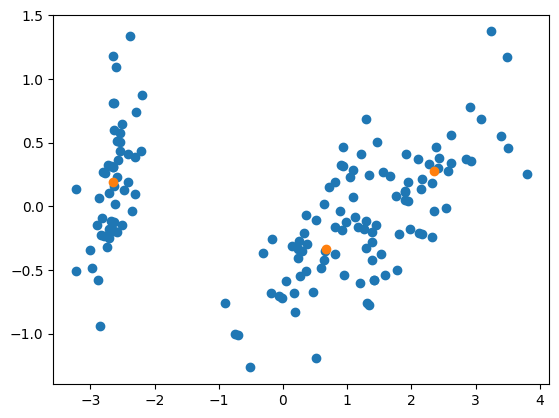

In [28]:
plt.scatter(x=features_pca[:,0]
            ,y=features_pca[:,1])       # 차원 축소 데이터
plt.scatter(x=model_KMeans.cluster_centers_[:,0]
            , y=model_KMeans.cluster_centers_[:,1]
            , cmap='red')   # 차원 축소 중심값
plt.show()

## 모델 배포